# Experiments with dynamic scaling and CNNs

_22 August 2021_ <br />
_Chuan-Zheng Lee <czlee@stanford.edu>_ <br />
_Rough working_

These are the first experiments I ran using the new CNNs (from `vanilla-cnns.ipynb`) on the digital framework.

In [1]:
import matplotlib.pyplot as plt
from plotting import plot_averaged_training_charts, plot_comparison, make_axes, show_timestamp_info

# Fashion-MNIST

In [2]:
paths = ["results/20210821-fmnist-cnn2-dynpowerquant", "results/20210821-fmnist-cnn-dynpowerquant-popeye2"]
show_timestamp_info(paths)

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **21 Aug 2021, 06:08:47** | 21 Aug 2021, 06:55:41 | 46 min 53 s |
| last to finish | 22 Aug 2021, 00:33:30 | **22 Aug 2021, 01:12:49** | 39 min 19 s |
| shortest | 21 Aug 2021, 17:01:15 | 21 Aug 2021, 17:28:29 | **27 min 14 s** |
| longest | 21 Aug 2021, 21:15:17 | 21 Aug 2021, 22:11:29 | **56 min 12 s** |


In [3]:
def get_comparison_specs(noise='__all__'):
    common_specs = {
        'rounds':                 ('expect', 150),
        'batch_size':             ('expect', 64),
        'epochs':                 ('expect', 1),
        'ema_coefficient':        ('expect', 1 / 3),
        'data_per_client':        ('expect', None),
        'save_squared_error':     ('expect', False),
        'send':                   ('expect', 'deltas'),
        'power':                  ('title',  1.0),
        'dataset':                ('title',  'fashionmnist-cnn2'),
        'lr_client':              ('title',  0.001),
        'momentum_client':        ('expect', 0.0),
        'weight_decay_client':    ('expect', 0.0),
        'optimizer_client':       ('expect', 'sgd'),
        'clients':                ('title',  20),
        'noise':                  ('series', noise),
        'lr_scheduler_client':    ('title',  ['multistep-100', 'multistep-100-0.1']),
    }
    analog_specs = common_specs.copy()
    analog_specs.update({
        'script': 'dynpower.py',
        'power_update_period':    ('expect', 1),
        'power_quantile':         ('expect', 0.9),
        'power_factor':           ('expect', 0.9),
    })
    digital_specs = common_specs.copy()
    digital_specs.update({
        'script': 'dynquant.py',
        'qrange_update_period':   ('expect', 1),
        'qrange_param_quantile':  ('expect', 0.9),
        'qrange_client_quantile': ('expect', 0.9),
        'channel_uses':           ('expect', None),
        'rounding_method':        ('expect', 'stochastic'),
        'parameter_schedule':     ('expect', 'staggered'),
        'zero_bits_strategy':     ('expect', 'read-zero'),
    })
    
    return analog_specs, digital_specs

def _plot_comparisons(field, paths, all_specs, zoom_ylim=None, axsize=(11, 7), **kwargs):
    axs = make_axes(2 if zoom_ylim else 1, axsize=axsize)
    kwargs.setdefault('extra_lines', ['confints'])
    plot_comparison(field, paths, *all_specs, ax=axs[0], **kwargs)
    if zoom_ylim:
        plot_comparison(field, paths, *all_specs, ax=axs[1], quiet=True, **kwargs)
        axs[1].set_ylim(zoom_ylim)

def plot_analog_vs_digital(paths, noise='__all__', field='accuracy', zoom_ylim=None, **kwargs):
    all_specs = get_comparison_specs(noise)
    _plot_comparisons(field, paths, all_specs, zoom_ylim=zoom_ylim, **kwargs)

These first two plots look pretty clean:

/home/czlee/kyanite/plotting.py:291: UserWarning: spec for lr_scheduler_client has action title and a list of values, are you sure about this wasn't meant to be series?
  warnings.warn(f"spec for {key} has action {action} and a list of values, "


- Skipping 24 runs that don't match on 1 keys: noise (24)
- Skipping 26 runs that don't match on 1 keys: noise (26)


/home/czlee/kyanite/plotting.py:291: UserWarning: spec for lr_scheduler_client has action title and a list of values, are you sure about this wasn't meant to be series?
  warnings.warn(f"spec for {key} has action {action} and a list of values, "


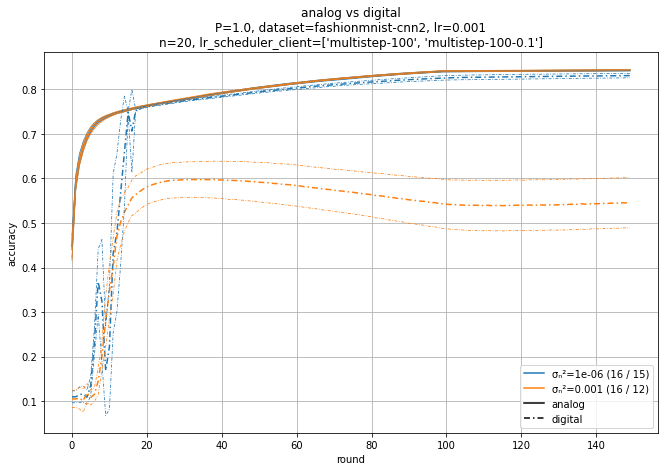

In [4]:
plot_analog_vs_digital(paths, noise=[1e-6, 1e-3])

The low-SNR situation is a lot more chaotic:

- Skipping 32 runs that don't match on 1 keys: noise (32)
- Skipping 27 runs that don't match on 1 keys: noise (27)


/home/czlee/kyanite/plotting.py:291: UserWarning: spec for lr_scheduler_client has action title and a list of values, are you sure about this wasn't meant to be series?
  warnings.warn(f"spec for {key} has action {action} and a list of values, "


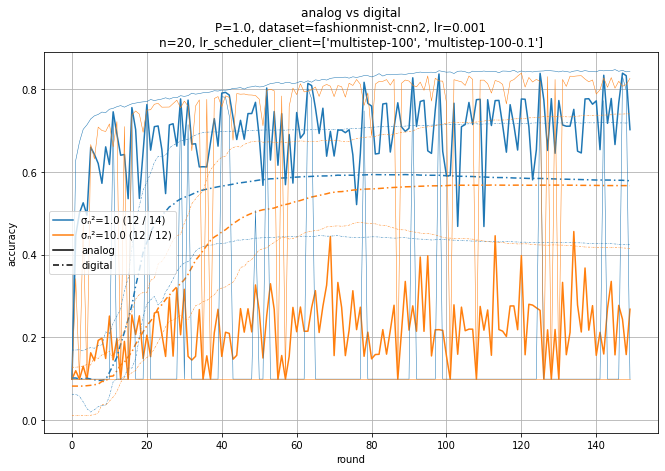

In [5]:
plot_analog_vs_digital(paths, noise=[1, 10], extra_lines=['range'])

# CIFAR-10

In [6]:
paths = ["results/20210821-cifar-resnet-dynpowerquant/"]
show_timestamp_info(paths)

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **21 Aug 2021, 06:09:00** | 21 Aug 2021, 07:42:48 | 1 h 33 min 48 s |
| last to finish | 21 Aug 2021, 12:09:01 | **21 Aug 2021, 13:33:47** | 1 h 24 min 45 s |
| shortest | 21 Aug 2021, 09:13:40 | 21 Aug 2021, 10:35:26 | **1 h 21 min 46 s** |
| longest | 21 Aug 2021, 06:09:49 | 21 Aug 2021, 07:47:20 | **1 h 37 min 30 s** |


In [7]:
def get_comparison_specs(noise='__all__'):
    common_specs = {
        'rounds':                 ('expect', 150),
        'batch_size':             ('title', 128),
        'epochs':                 ('expect', 1),
        'ema_coefficient':        ('expect', 1 / 3),
        'data_per_client':        ('expect', None),
        'save_squared_error':     ('expect', False),
        'send':                   ('expect', 'deltas'),
        'power':                  ('title',  1.0),
        'dataset':                ('title',  'cifar10-resnet20-flipcrop'),
        'lr_client':              ('title',  0.1),
        'momentum_client':        ('title',  0.9),
        'weight_decay_client':    ('title',  1e-4),
        'optimizer_client':       ('expect', 'sgd'),
        'clients':                ('title',  20),
        'noise':                  ('series', noise),
        'lr_scheduler_client':    ('title',  'multistep-100'),
    }
    analog_specs = common_specs.copy()
    analog_specs.update({
        'script': 'dynpower.py',
        'power_update_period':    ('expect', 1),
        'power_quantile':         ('expect', 0.9),
        'power_factor':           ('expect', 0.9),
    })
    digital_specs = common_specs.copy()
    digital_specs.update({
        'script': 'dynquant.py',
        'qrange_update_period':   ('expect', 1),
        'qrange_param_quantile':  ('expect', 0.9),
        'qrange_client_quantile': ('expect', 0.9),
        'channel_uses':           ('expect', None),
        'rounding_method':        ('expect', 'stochastic'),
        'parameter_schedule':     ('expect', 'staggered'),
        'zero_bits_strategy':     ('expect', 'read-zero'),
    })
    
    return analog_specs, digital_specs

This whole thing is a shambles:

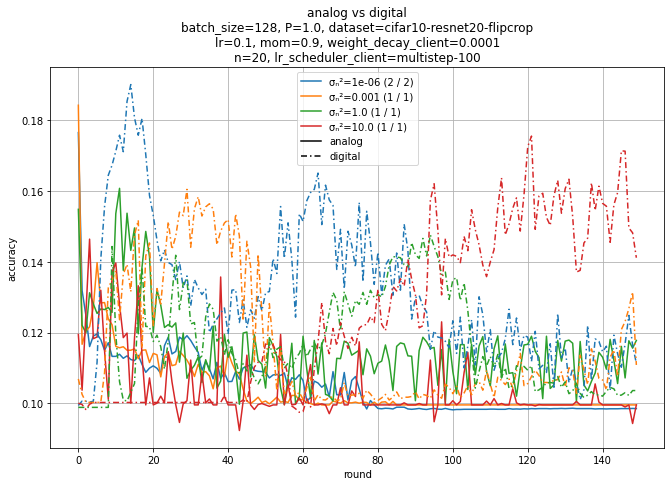

In [8]:
plot_analog_vs_digital(paths, noise=[1e-6, 1e-3, 1, 10], extra_lines=[])

# CIFAR-10, just plain federated averaging

Is it because of the noise, or is (our implementation of) federated averaging just a bad idea from the get-go?

In [9]:
paths = ["results/20210821-cifar-resnet-fedavg/"]
show_timestamp_info(paths)

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **21 Aug 2021, 13:29:16** | 21 Aug 2021, 13:42:05 | 12 min 49 s |
| last to finish | 21 Aug 2021, 17:30:30 | **21 Aug 2021, 18:52:12** | 1 h 21 min 42 s |
| shortest | 21 Aug 2021, 13:29:16 | 21 Aug 2021, 13:42:05 | **12 min 49 s** |
| longest | 21 Aug 2021, 14:24:20 | 21 Aug 2021, 15:46:31 | **1 h 22 min 11 s** |


In [10]:
specs = {
    'script': 'fedavg.py',
    'rounds':                 ('expect', 150),
    'batch_size':             ('expect', 128),
    'epochs':                 ('expect', 1),
    'data_per_client':        ('title',  None),
    'save_squared_error':     ('expect', False),
    'send':                   ('expect', 'deltas'),
    'dataset':                ('title',  'cifar10-resnet20-flipcrop'),
    'lr_client':              ('expect', 0.1),
    'momentum_client':        ('expect', 0.9),
    'weight_decay_client':    ('expect', 1e-4),
    'optimizer_client':       ('expect', 'sgd'),
    'clients':                ('series', '__all__'),
    'lr_scheduler_client':    ('expect', 'multistep-100'),
}


- Skipping 4 runs that don't match on 1 keys: data_per_client (4)


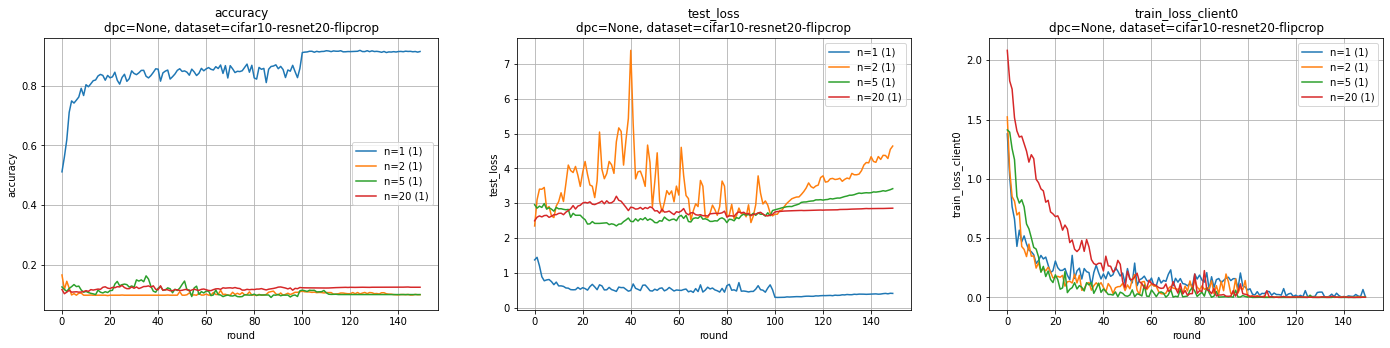

In [11]:
plot_averaged_training_charts(paths, ['accuracy', 'test_loss', 'train_loss_client0'], specs)

- Skipping 4 runs that don't match on 1 keys: data_per_client (4)


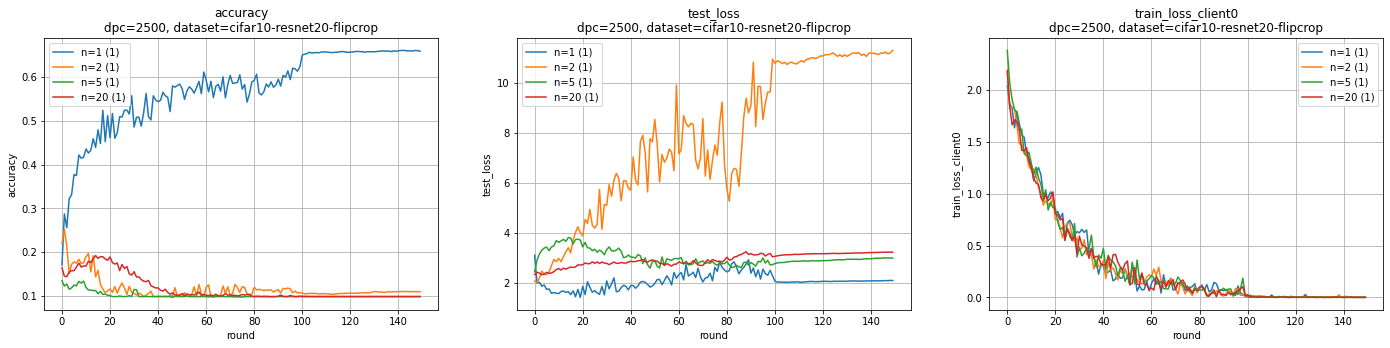

In [12]:
specs['data_per_client'] = ('title', 2500)
plot_averaged_training_charts(paths, ['accuracy', 'test_loss', 'train_loss_client0'], specs)